# Practica 2: Predicción de Series Temporales

# Autores: 

- Alejandro López Cuéllar
- Miguel Ángel Vera Frutos
- Alejandro Belda Fernández


# Importación de librerías

In [170]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import os
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [171]:
locale.setlocale(locale.LC_TIME, "es_ES.UTF-8")  # Ajusta "es_ES.UTF-8" según tu sistema operativo.
locale.setlocale(locale.LC_TIME, "Spanish_Spain.1252")

'Spanish_Spain.1252'

# Definición de la ruta

In [172]:
ruta = "dataset/Aljorrahorarias2017.xls"
ruta2 = "dataset/Aljorrahorarias2018.xls"
ruta3 = "dataset/Aljorrahorarias2019.xls"
ruta4 = "dataset/Aljorrahorarias2020.xls"
ruta5 = "dataset/Aljorrahorarias2021.xls"
ruta6 = "dataset/Aljorrahorarias2022.xls"


In [173]:
# Leer el archivo completo
df = pd.read_excel(ruta, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df["Fecha"] = df["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df.set_index("Fecha", inplace=True)


# Leer el archivo completo
df2 =  pd.read_excel(ruta2, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df2["Fecha"] = df2["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df2.set_index("Fecha", inplace=True)

# Leer el archivo completo
df3 =  pd.read_excel(ruta3, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df3["Fecha"] = df3["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df3.set_index("Fecha", inplace=True)

# Leer el archivo completo
df4 =  pd.read_excel(ruta4, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
df4["Fecha"] = df4["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df4.set_index("Fecha", inplace=True)

# Leer el archivo completo
df5 =  pd.read_excel(ruta5, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df5["Fecha"] = df5["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df5.set_index("Fecha", inplace=True)

# Leer el archivo completo
df6 =  pd.read_excel(ruta6, engine='xlrd', skiprows=1, parse_dates=["Fecha"], date_format="%d %b %Y %H:%M")
# Establecer los minutos a 00, y redondear la fecha a la hora
df6["Fecha"] = df6["Fecha"].dt.floor('H')

# Establecer "Fecha" como el índice
df6.set_index("Fecha", inplace=True)




*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Fecha"] = df["Fecha"].dt.floor('H')
C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df2["Fecha"] = df2["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df3["Fecha"] = df3["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df4["Fecha"] = df4["Fecha"].dt.floor('H')


*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df5["Fecha"] = df5["Fecha"].dt.floor('H')
C:\Users\migue\AppData\Local\Temp\ipykernel_26604\1045028487.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df6["Fecha"] = df6["Fecha"].dt.floor('H')


In [174]:
data= pd.concat([df,df2,df3,df4,df5,df6])

# Guardar en un archivo CSV
df.to_csv('dataset.csv', index=False)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2017-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    47992 non-null  float64
 1   NO2 (µg/m³N)   47992 non-null  float64
 2   SO2 (µg/m³N)   46390 non-null  float64
 3   O3 (µg/m³N)    46626 non-null  float64
 4   TMP (ºC)       51251 non-null  float64
 5   HR (% H.R.)    51251 non-null  float64
 6   NOX (µg/m³N)   47992 non-null  float64
 7   DD (grados)    51251 non-null  float64
 8   PRB (mb)       51251 non-null  float64
 9   RS (W/m³)      51251 non-null  float64
 10  VV (m/s)       51252 non-null  float64
 11  C6H6 (µg/m³N)  14069 non-null  float64
 12  C7H8 (µg/m³N)  14069 non-null  float64
 13  XIL (µg/m³N)   14069 non-null  float64
 14  PM10 (µg/m³N)  49744 non-null  float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 6.8 MB


In [176]:
#data.asfreq('1h')
data.asfreq("D")

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N),Ruido (dBA)
Fecha,,,,,,,,,,,,,,,,
2017-01-01,5.0,30.0,15.0,43.0,10.0,85.0,37.0,299.0,1031.0,2.0,1.0,NaN,NaN,NaN,26.00,NaN
2017-01-02,3.0,21.0,6.0,53.0,11.0,88.0,26.0,248.0,1023.0,3.0,1.0,NaN,NaN,NaN,16.00,NaN
2017-01-03,6.0,40.0,6.0,38.0,10.0,95.0,49.0,307.0,1023.0,2.0,1.0,NaN,NaN,NaN,30.00,NaN
2017-01-04,5.0,37.0,7.0,37.0,12.0,68.0,45.0,221.0,1025.0,3.0,1.0,NaN,NaN,NaN,29.00,NaN
2017-01-05,3.0,17.0,8.0,60.0,15.0,62.0,21.0,304.0,1023.0,2.0,1.0,NaN,NaN,NaN,6.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2.6,11.2,3.7,12.6,12.0,88.0,15.2,306.0,1028.0,3.0,1.0,NaN,NaN,NaN,23.70,NaN
2022-12-28,2.4,9.8,6.0,38.4,10.0,95.0,13.6,302.0,1028.0,3.0,1.0,NaN,NaN,NaN,21.44,NaN
2022-12-29,2.2,11.0,2.7,34.9,11.0,100.0,14.4,306.0,1023.0,3.0,1.0,NaN,NaN,NaN,29.53,NaN


In [177]:
data.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),C6H6 (µg/m³N),C7H8 (µg/m³N),XIL (µg/m³N),PM10 (µg/m³N),Ruido (dBA)
Fecha,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,5.0,30.0,15.0,43.0,10.0,85.0,37.0,299.0,1031.0,2.0,1.0,NaN,NaN,NaN,26.0,NaN
2017-01-01 01:00:00,4.0,27.0,12.0,41.0,9.0,84.0,34.0,300.0,1030.0,2.0,1.0,NaN,NaN,NaN,25.0,NaN
2017-01-01 02:00:00,5.0,25.0,14.0,39.0,9.0,86.0,33.0,300.0,1030.0,2.0,1.0,NaN,NaN,NaN,21.0,NaN
2017-01-01 03:00:00,3.0,16.0,15.0,43.0,8.0,85.0,21.0,301.0,1029.0,3.0,1.0,NaN,NaN,NaN,18.0,NaN
2017-01-01 04:00:00,4.0,15.0,14.0,46.0,8.0,84.0,22.0,302.0,1029.0,2.0,1.0,NaN,NaN,NaN,16.0,NaN


In [178]:
#fechas_esperadas =  pd.date_range(start=data.index.min(), end=data.index.max(), freq='1h')
fechas_esperadas =  pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
fechas_perdidas = fechas_esperadas.difference(data.index)
fechas_perdidas

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [179]:
print(f'Tenemos un tota de {len(fechas_perdidas)} fechas perdidas')

Tenemos un tota de 0 fechas perdidas


In [180]:
data = data.reindex(fechas_esperadas)


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2017-01-01 to 2022-12-31
Freq: D
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO (µg/m³N)    2001 non-null   float64
 1   NO2 (µg/m³N)   2001 non-null   float64
 2   SO2 (µg/m³N)   1936 non-null   float64
 3   O3 (µg/m³N)    1944 non-null   float64
 4   TMP (ºC)       2135 non-null   float64
 5   HR (% H.R.)    2135 non-null   float64
 6   NOX (µg/m³N)   2001 non-null   float64
 7   DD (grados)    2135 non-null   float64
 8   PRB (mb)       2135 non-null   float64
 9   RS (W/m³)      2135 non-null   float64
 10  VV (m/s)       2135 non-null   float64
 11  C6H6 (µg/m³N)  587 non-null    float64
 12  C7H8 (µg/m³N)  587 non-null    float64
 13  XIL (µg/m³N)   587 non-null    float64
 14  PM10 (µg/m³N)  2075 non-null   float64
 15  Ruido (dBA)    0 non-null      float64
dtypes: float64(16)
memory usage: 355.5 KB


In [182]:
data.isna().sum()

NO (µg/m³N)       190
NO2 (µg/m³N)      190
SO2 (µg/m³N)      255
O3 (µg/m³N)       247
TMP (ºC)           56
HR (% H.R.)        56
NOX (µg/m³N)      190
DD (grados)        56
PRB (mb)           56
RS (W/m³)          56
VV (m/s)           56
C6H6 (µg/m³N)    1604
C7H8 (µg/m³N)    1604
XIL (µg/m³N)     1604
PM10 (µg/m³N)     116
Ruido (dBA)      2191
dtype: int64

In [183]:
data = data.drop(columns=['Ruido (dBA)', 'C6H6 (µg/m³N)', 'C7H8 (µg/m³N)', 'XIL (µg/m³N)'])

In [184]:
data.head()

,NO (µg/m³N),NO2 (µg/m³N),SO2 (µg/m³N),O3 (µg/m³N),TMP (ºC),HR (% H.R.),NOX (µg/m³N),DD (grados),PRB (mb),RS (W/m³),VV (m/s),PM10 (µg/m³N)
2017-01-01,5.0,30.0,15.0,43.0,10.0,85.0,37.0,299.0,1031.0,2.0,1.0,26.0
2017-01-02,3.0,21.0,6.0,53.0,11.0,88.0,26.0,248.0,1023.0,3.0,1.0,16.0
2017-01-03,6.0,40.0,6.0,38.0,10.0,95.0,49.0,307.0,1023.0,2.0,1.0,30.0
2017-01-04,5.0,37.0,7.0,37.0,12.0,68.0,45.0,221.0,1025.0,3.0,1.0,29.0
2017-01-05,3.0,17.0,8.0,60.0,15.0,62.0,21.0,304.0,1023.0,2.0,1.0,6.0


In [185]:
duplicates = data.index.duplicated()
print(data.index[duplicates])
print(data.index.is_unique)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')
True


In [186]:
from sklearn.impute import KNNImputer

# Configurar el imputador KNN
imputer = KNNImputer(n_neighbors=10)

# Aplicar KNN imputación
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Mostrar resultados
print("Antes de KNN:")
print(data)
print("\nDespués de KNN:")
print(data_imputed)

Antes de KNN:
            NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  TMP (ºC)  \
2017-01-01          5.0          30.0          15.0         43.0      10.0   
2017-01-02          3.0          21.0           6.0         53.0      11.0   
2017-01-03          6.0          40.0           6.0         38.0      10.0   
2017-01-04          5.0          37.0           7.0         37.0      12.0   
2017-01-05          3.0          17.0           8.0         60.0      15.0   
...                 ...           ...           ...          ...       ...   
2022-12-27          2.6          11.2           3.7         12.6      12.0   
2022-12-28          2.4           9.8           6.0         38.4      10.0   
2022-12-29          2.2          11.0           2.7         34.9      11.0   
2022-12-30          2.4          12.5           2.1         30.0      12.0   
2022-12-31          2.4          12.3           2.8         35.6      12.0   

            HR (% H.R.)  NOX (µg/m³N)  DD (grados

In [187]:
# Diccionario para almacenar los resultados de imputación
imputed_datasets = {}

# Probar diferentes números de vecinos
for n in [2, 5, 7, 10]:
    imputer = KNNImputer(n_neighbors=n)
    imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    imputed_data.index = data.index
    imputed_datasets[n] = imputed_data  # Almacenar el resultado en el diccionario
    
    print(f"\nImputación con {n} vecinos:")
    print(imputed_data.head())


Imputación con 2 vecinos:
            NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  TMP (ºC)  \
2017-01-01          5.0          30.0          15.0         43.0      10.0   
2017-01-02          3.0          21.0           6.0         53.0      11.0   
2017-01-03          6.0          40.0           6.0         38.0      10.0   
2017-01-04          5.0          37.0           7.0         37.0      12.0   
2017-01-05          3.0          17.0           8.0         60.0      15.0   

            HR (% H.R.)  NOX (µg/m³N)  DD (grados)  PRB (mb)  RS (W/m³)  \
2017-01-01         85.0          37.0        299.0    1031.0        2.0   
2017-01-02         88.0          26.0        248.0    1023.0        3.0   
2017-01-03         95.0          49.0        307.0    1023.0        2.0   
2017-01-04         68.0          45.0        221.0    1025.0        3.0   
2017-01-05         62.0          21.0        304.0    1023.0        2.0   

            VV (m/s)  PM10 (µg/m³N)  
2017-01-01     

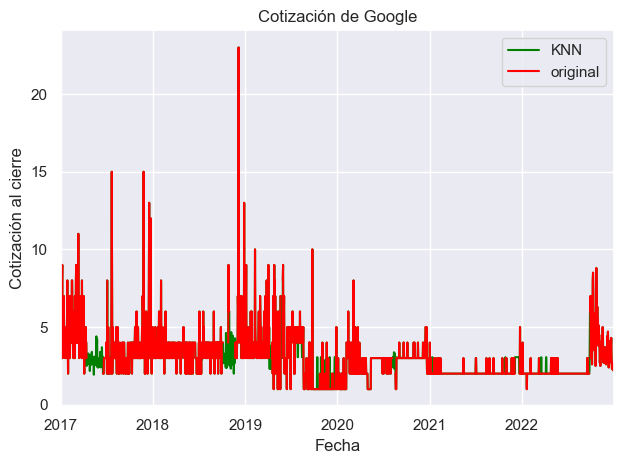

In [188]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['KNN','original'])
plt.tight_layout()

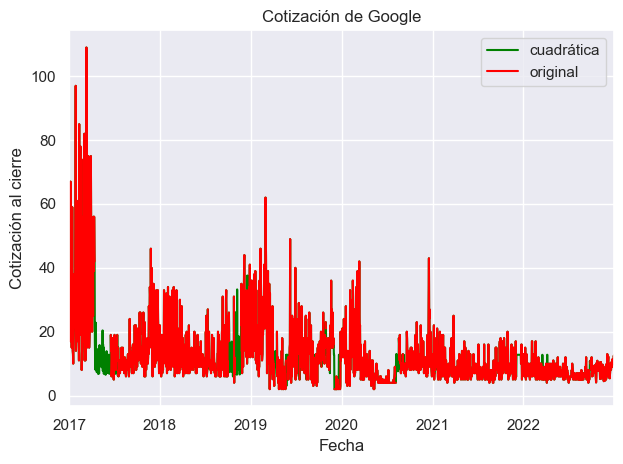

In [189]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO2 (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO2 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

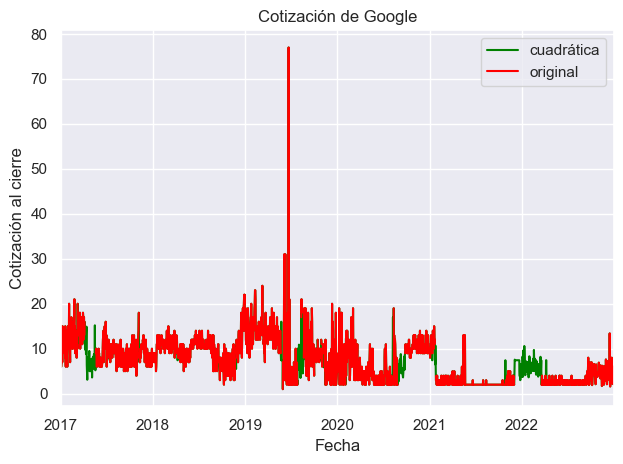

In [190]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["SO2 (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["SO2 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

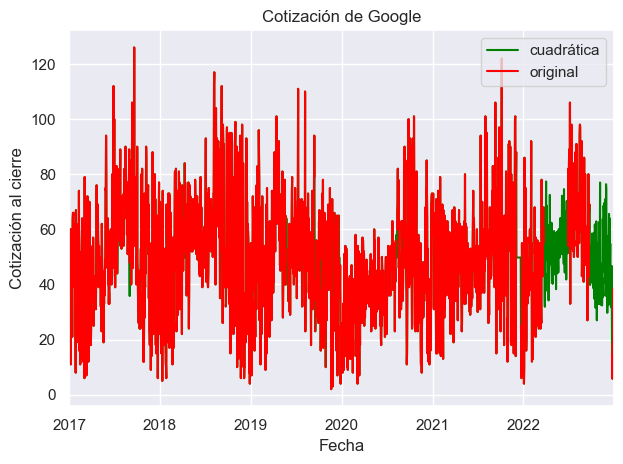

In [191]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["O3 (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["O3 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

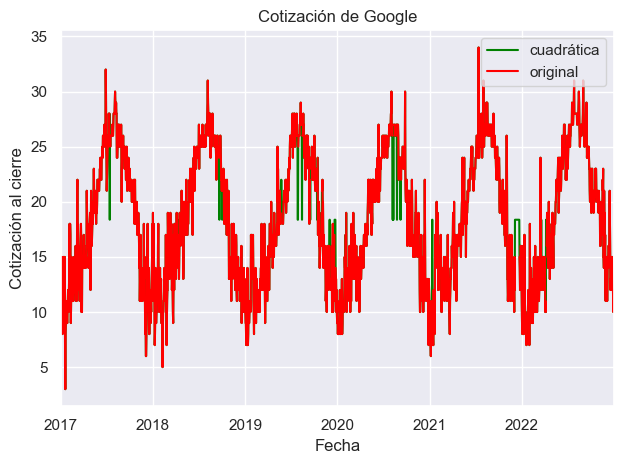

In [192]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["TMP (ºC)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["TMP (ºC)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

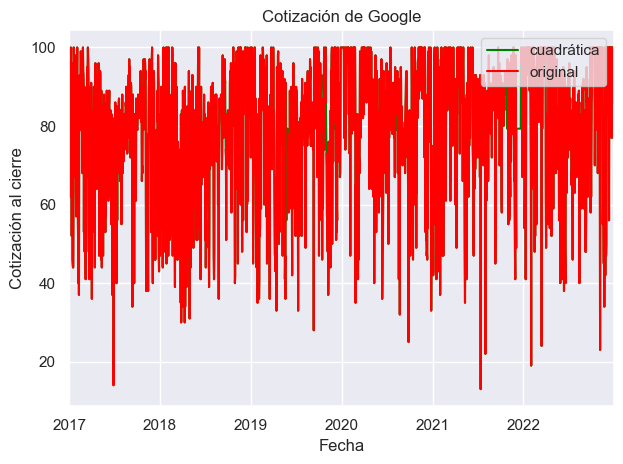

In [193]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["HR (% H.R.)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["HR (% H.R.)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

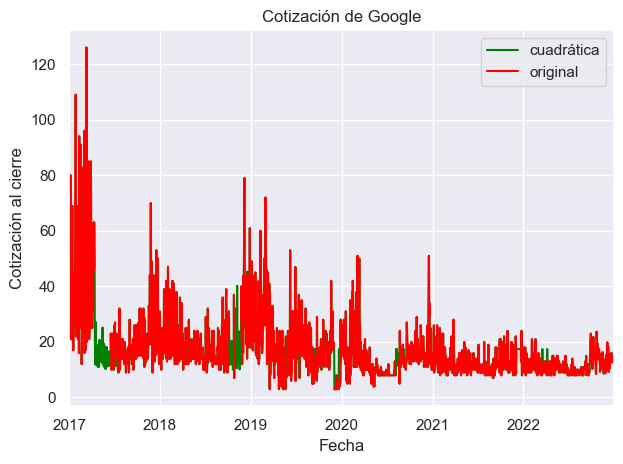

In [194]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NOX (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NOX (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

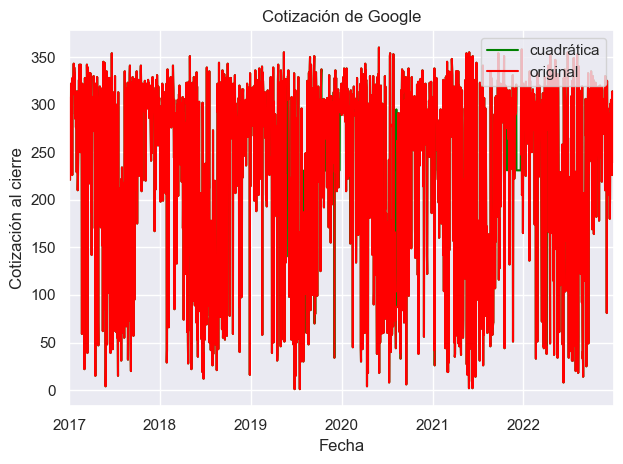

In [195]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["DD (grados)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["DD (grados)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

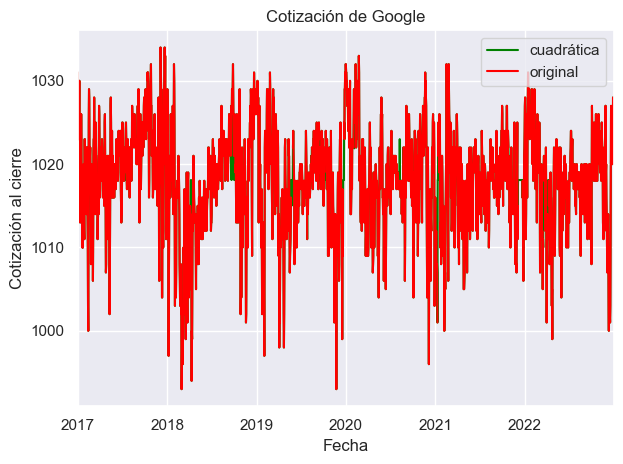

In [196]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["PRB (mb)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["PRB (mb)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

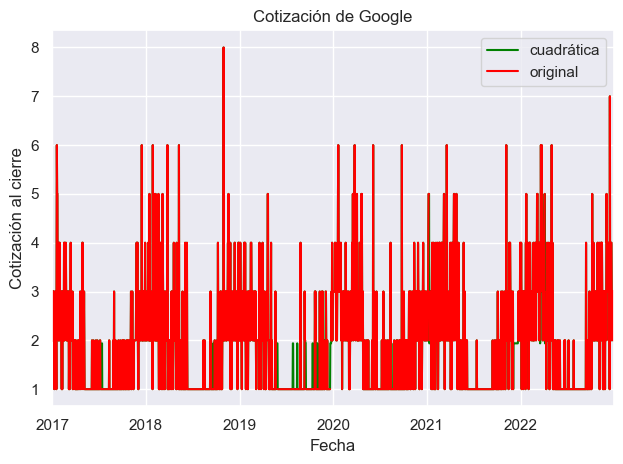

In [197]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["RS (W/m³)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["RS (W/m³)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

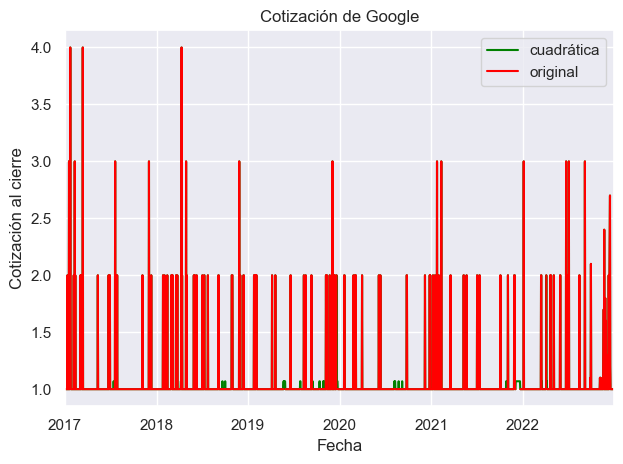

In [198]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["VV (m/s)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["VV (m/s)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

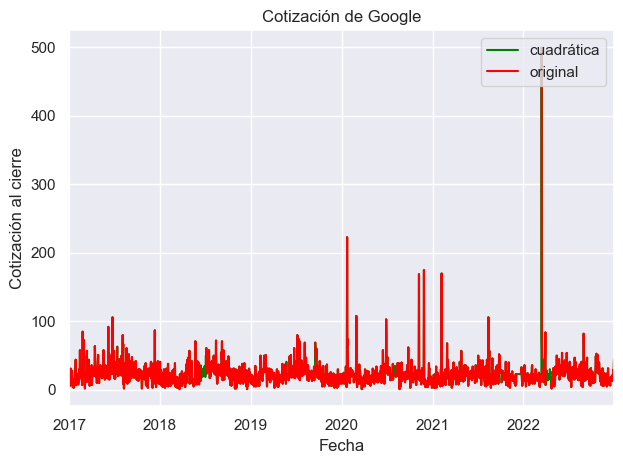

In [199]:
ax = imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["PM10 (µg/m³N)"].plot(color='green')
data['2017-01-01 00:00:00':'2022-12-31 23:00:00']["PM10 (µg/m³N)"].plot(color='red')

ax.set_ylabel("Cotización al cierre")
ax.set_xlabel("Fecha")
ax.set_title("Cotización de Google")
ax.legend(loc='upper right', labels = ['cuadrática','original'])
plt.tight_layout()

In [200]:
from statsmodels.tsa.stattools import adfuller

for column in imputed_datasets[10].columns:
    result = adfuller(imputed_datasets[10][column])
    print("----" + column + "----")
    print('Estadístico ADF : %f' % result[0])
    print('p-value: %f' % result[1])
    print('Valores críticos:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

----NO (µg/m³N)----
Estadístico ADF : -3.748254
p-value: 0.003483
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----NO2 (µg/m³N)----
Estadístico ADF : -5.046451
p-value: 0.000018
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----SO2 (µg/m³N)----
Estadístico ADF : -3.082789
p-value: 0.027853
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----O3 (µg/m³N)----
Estadístico ADF : -4.447331
p-value: 0.000245
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----TMP (ºC)----
Estadístico ADF : -2.671649
p-value: 0.079074
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----HR (% H.R.)----
Estadístico ADF : -12.843896
p-value: 0.000000
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----NOX (µg/m³N)----
Estadístico ADF : -4.755060
p-value: 0.000066
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----DD (grados)----
Estadístico ADF : -4.246586
p-value: 0.000549
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567
----PRB (mb)----
Estadístico AD

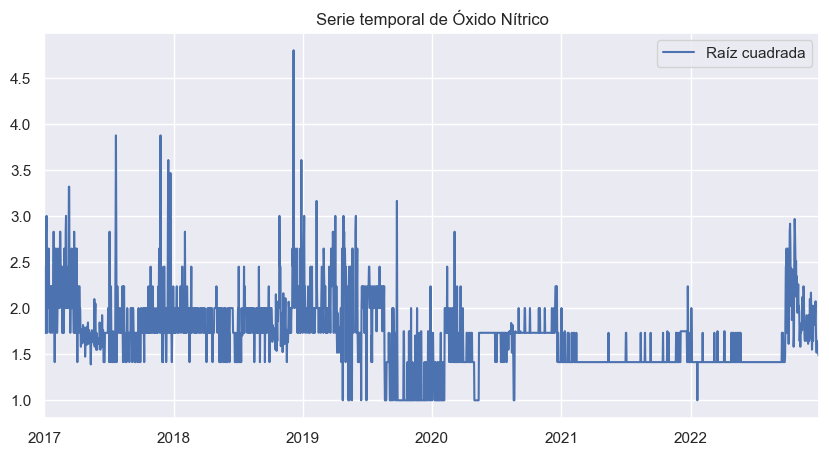

In [201]:
dataset_raiz = np.sqrt(imputed_datasets[10])
ax = dataset_raiz["NO (µg/m³N)"].plot(figsize=(10, 5))
ax.set_title('Serie temporal de Óxido Nítrico')
ax.legend(labels=['Raíz cuadrada'])

In [202]:
result = adfuller(dataset_raiz["NO (µg/m³N)"])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Estadístico ADF : -3.662396
p-value: 0.004674
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567


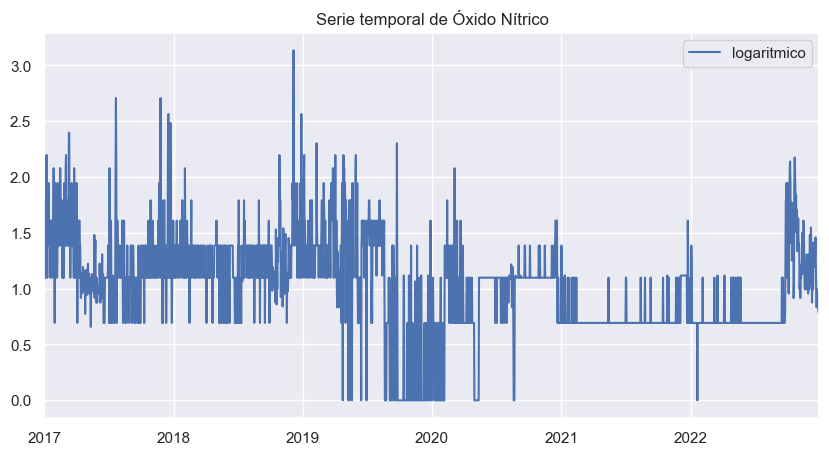

In [203]:
dataset_log = np.log(imputed_datasets[10])
ax = dataset_log["NO (µg/m³N)"].plot(figsize=(10, 5))
ax.set_title('Serie temporal de Óxido Nítrico')
ax.legend(labels=['logaritmico'])

In [204]:
result = adfuller(dataset_log["NO (µg/m³N)"])
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.455245
p-value: 0.000237
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567


lambda = -0.010074825743731156


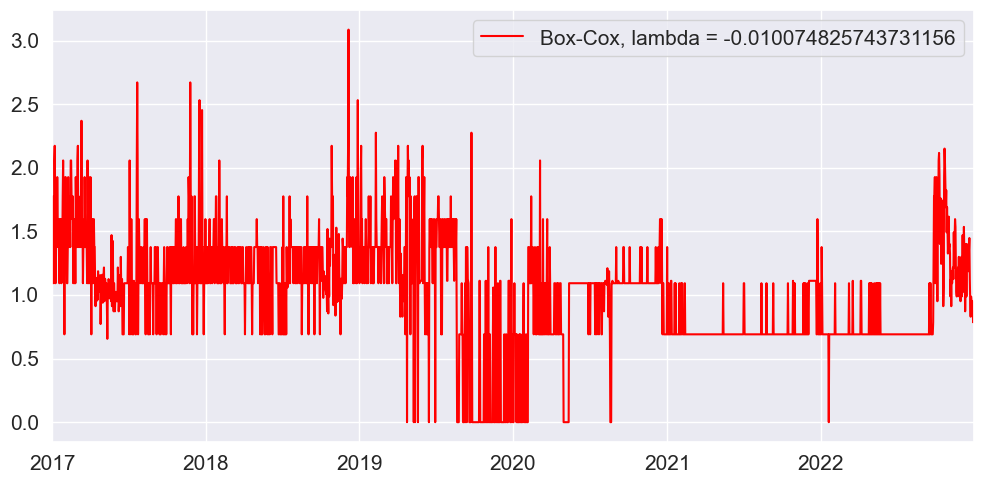

In [211]:
dataset_cox , lambda_opt = boxcox(imputed_datasets[10]["NO (µg/m³N)"])
serie_boxcox = pd.Series(dataset_cox, index=imputed_datasets[10]["NO (µg/m³N)"].index)
# Crear el primer gráfico
ax = serie_boxcox.plot(figsize=[10, 5], color='red',label='sqrt',fontsize = 15)
print(f'lambda = {lambda_opt}')

ax.legend(labels=[f'Box-Cox, lambda = {lambda_opt}'],fontsize=15)
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [206]:
result = adfuller(dataset_cox)
print('Estadístico ADF : %f' % result[0])
print('p-value: %f' % result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Estadístico ADF : -4.451152
p-value: 0.000241
Valores críticos:
	1%: -3.433
	5%: -2.863
	10%: -2.567


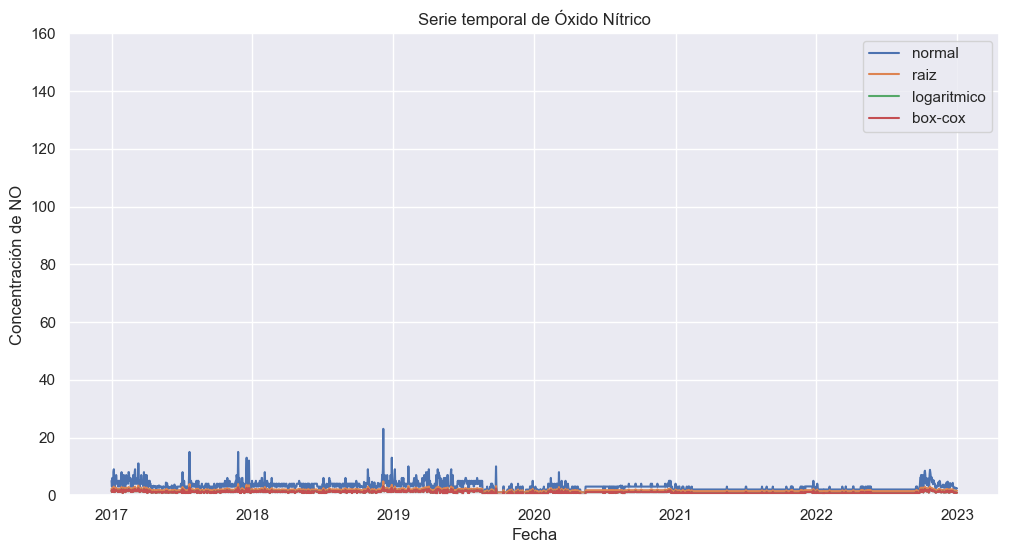

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(imputed_datasets[10]['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"], label='normal')
plt.plot(dataset_raiz['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"], label='raiz')
plt.plot(serie_boxcox['2017-01-01 00:00:00':'2022-12-31 23:00:00'], label='logaritmico')
plt.plot(dataset_log['2017-01-01 00:00:00':'2022-12-31 23:00:00']["NO (µg/m³N)"], label='box-cox')
plt.title("Serie temporal de Óxido Nítrico")
plt.xlabel("Fecha")
plt.ylim(0,160)
plt.ylabel("Concentración de NO")
plt.legend()
plt.show()

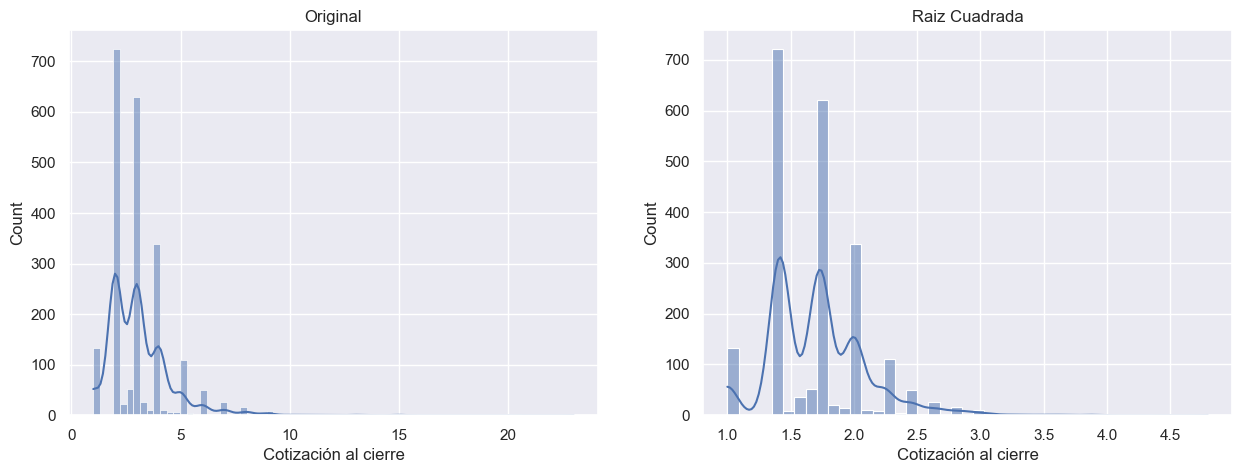

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los subplots
_, axs = plt.subplots(1, 2, figsize=(15, 5))

# Series y títulos
series = [imputed_datasets[10]["NO (µg/m³N)"], dataset_raiz["NO (µg/m³N)"]]
titulos = ['Original', 'Raiz Cuadrada']
axs = axs.flatten()

# Configurar seaborn
sns.set(font_scale=1)

# Configuración del gráfico
for df, ax, titulo in zip(series, axs, titulos):
    sns.histplot(df, kde=True, stat='count', ax=ax)
    ax.set_xlabel('Cotización al cierre')
    ax.set_title(titulo)
    
    # Verificar si hay una leyenda y ocultarla
    legend = ax.get_legend()
    if legend:
        legend.set_visible(False)

# Mostrar el gráfico
plt.show()


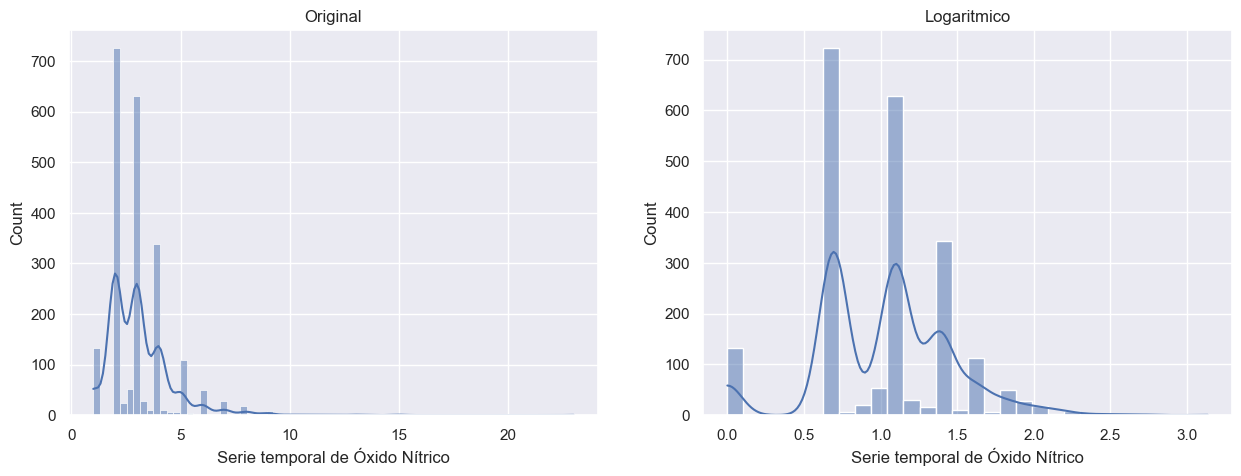

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear los subplots
_, axs = plt.subplots(1, 2, figsize=(15, 5))

# Series y títulos
series = [imputed_datasets[10]["NO (µg/m³N)"], dataset_log["NO (µg/m³N)"]]
titulos = ['Original', 'Logaritmico']
axs = axs.flatten()

# Configurar seaborn
sns.set(font_scale=1)

# Configuración del gráfico
for df, ax, titulo in zip(series, axs, titulos):
    sns.histplot(df, kde=True, stat='count', ax=ax)
    ax.set_xlabel('Serie temporal de Óxido Nítrico')
    ax.set_title(titulo)
    
    # Verificar si hay una leyenda y ocultarla
    legend = ax.get_legend()
    if legend:
        legend.set_visible(False)

# Mostrar el gráfico
plt.show()

In [210]:
train = imputed_datasets[10][:-168]
test = imputed_datasets[10][-168:]

print(test)

            NO (µg/m³N)  NO2 (µg/m³N)  SO2 (µg/m³N)  O3 (µg/m³N)  TMP (ºC)  \
2022-07-17          2.0           9.0           2.0         61.0      27.0   
2022-07-18          2.0           8.0           3.0         71.0      29.0   
2022-07-19          2.0           8.0           2.0         84.0      28.0   
2022-07-20          2.0           5.0           2.0         67.0      27.0   
2022-07-21          2.0           5.0           2.0         52.0      27.0   
...                 ...           ...           ...          ...       ...   
2022-12-27          2.6          11.2           3.7         12.6      12.0   
2022-12-28          2.4           9.8           6.0         38.4      10.0   
2022-12-29          2.2          11.0           2.7         34.9      11.0   
2022-12-30          2.4          12.5           2.1         30.0      12.0   
2022-12-31          2.4          12.3           2.8         35.6      12.0   

            HR (% H.R.)  NOX (µg/m³N)  DD (grados)  PRB (mb)  R